In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
fake=pd.read_csv('/content/drive/MyDrive/fake-real-news-dataset-main/data/Fake.csv')


In [ ]:
fake.head()

In [ ]:
fake.columns

In [ ]:
fake['subject'].value_counts()

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake)


In [ ]:
text=' '.join(fake['text'].tolist())

In [ ]:
wordcloud = WordCloud(width=1920,height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## **Real Data Analysis**

In [ ]:
real=pd.read_csv('/content/drive/MyDrive/fake-real-news-dataset-main/data/True.csv')

In [ ]:
real.head()

In [ ]:
real.tail()

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=real)

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake)

In [ ]:
real.sample(20)

In [ ]:
real.shape

In [ ]:
text=' '.join(real['text'].tolist())

wordcloud = WordCloud(width=1920,height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record =row.split('-', maxsplit=1)
    record[1]
    assert(len(record[0])<120)

  except:
    unknown_publishers.append(index)

In [ ]:
len(unknown_publishers)

In [ ]:
real.iloc[unknown_publishers].text

In [ ]:
real.iloc[8970]

In [ ]:
real = real.drop(8970, axis=0)

In [ ]:
publisher= []
tmp_text=[]

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')


  else:
    record=row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())


In [ ]:
real['publisher']=publisher
real['text']=tmp_text

In [ ]:
real.head()

In [ ]:
real.shape

In [ ]:
empty_fake_index = [index for index,text in enumerate (fake.text.tolist()) if str(text).strip()=='']

In [ ]:
fake.iloc[empty_fake_index]

In [ ]:

real['text']= real['title'] +  " " + real['text']
fake['text']= fake['title'] +  " " + fake['text']

In [ ]:
real['text'] = real['text'].apply(lambda x: str(x).lower())

fake['text'] = fake['text'].apply(lambda x: str(x).lower())

**Preprocessing Text**

In [ ]:
real['class'] = 1
fake['class'] = 0

In [ ]:
real.columns

In [ ]:
real = real[['text','class']]

In [ ]:
fake = fake[['text','class']]

In [ ]:
data = real.append(fake, ignore_index=True)

In [ ]:
data

In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 18.9 MB/s 
     |████████████████████████████████| 3.7 MB 62.7 MB/s 
     |████████████████████████████████| 2.2 MB 60.3 MB/s 
     |████████████████████████████████| 208 kB 73.1 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.5
    Uninstalling srsly-2.4.5:
      Successfully uninstalled srsly-2.4.5
  Attempting uninstall: blis
    Found existing installation: blis 0.7.9
    Uninstalling blis-0.7.9:
      Successfully uninstalled blis-0.7.9
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.5
    Uninstalling thinc-8.1.5:
      Successfully uninstalled thinc-8.1.5
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: spacy
    Found existing installation: s

In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-7jgpwj87
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-7jgpwj87
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=ddb931ef012d57cfd71f9e8c77ec2b07bd68ea2f90a0c91d455d0b591f2278b7
  Stored in directory: /tmp/pip-ephem-wheel-cache-2ux_iklj/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
data['text'] = data['text'].apply(lambda x:ps.remove_special_chars(x))

In [ ]:
  #data['text'] = data['text'].apply(lambda x: re.sub("(.)\\1{2,}", "\\1", x))

In [ ]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


In [ ]:
import gensim

In [ ]:
y=data['class'].values

In [ ]:
X = [d.split() for d in data['text'].tolist()]

In [ ]:
type(X)

list

In [ ]:
X[0]

['as',
 'us',
 'budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'their',
 'fiscal',
 'script',
 'the',
 'head',
 'of',
 'a',
 'conservative',
 'republican',
 'faction',
 'in',
 'the',
 'us',
 'congress',
 'who',
 'voted',
 'this',
 'month',
 'for',
 'a',
 'huge',
 'expansion',
 'of',
 'the',
 'national',
 'debt',
 'to',
 'pay',
 'for',
 'tax',
 'cuts',
 'called',
 'himself',
 'a',
 'fiscal',
 'conservative',
 'on',
 'sunday',
 'and',
 'urged',
 'budget',
 'restraint',
 'in',
 '2018',
 'in',
 'keeping',
 'with',
 'a',
 'sharp',
 'pivot',
 'under',
 'way',
 'among',
 'republicans',
 'us',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'on',
 'cbs',
 'face',
 'the',
 'nation',
 'drew',
 'a',
 'hard',
 'line',
 'on',
 'federal',
 'spending',
 'which',
 'lawmakers',
 'are',
 'bracing',
 'to',
 'do',
 'battle',
 'over',
 'in',
 'january',
 'when',
 'they',
 'return',
 'from',
 'the',
 'holidays',
 'on',
 'wednesday',
 'lawmakers',
 'will',
 'begin',
 'trying',
 'to',
 'pass',
 

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

231872

In [ ]:
w2v_model.wv.most_similar('washington')

[('medill', 0.6124660968780518),
 ('huffington', 0.5893942713737488),
 ('quoread', 0.5521575212478638),
 ('pictwittercom0wybx8dosp', 0.5467045903205872),
 ('availed', 0.4987451434135437),
 ('easternaccording', 0.4713645875453949),
 ('againconsider', 0.4643666744232178),
 ('leaksthere', 0.45531606674194336),
 ('russiafor', 0.4472387433052063),
 ('franciscojudge', 0.4459448754787445)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:


X = tokenizer.texts_to_sequences(X)

In [ ]:



tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

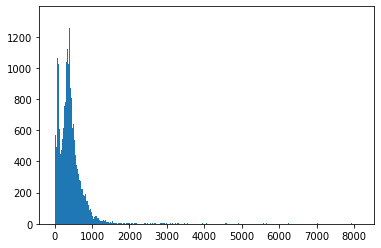

In [ ]:

plt.hist([len(x) for x in X], bins=700)
plt.show()

In [ ]:

plt.figure(figsize=(10,6))
sns.countplot(x='subject',data='data')

AttributeError: ignored

<Figure size 720x432 with 0 Axes>

In [ ]:


nos = np.array([len(x) for x in X])

In [ ]:
len(nos[nos>1000])

1581

In [ ]:
maxlen =1000
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
len(X[101])

1000

In [ ]:
vocab_size = len(tokenizer.word_index)+1
vocab = tokenizer.word_index

In [ ]:


def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size,DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]
  return weight_matrix

In [ ]:

embedding_vectors = get_weight_matrix(w2v_model)


In [ ]:

embedding_vectors.shape

(231873, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [ ]:


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23187300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,304,677
Trainable params: 117,377
Non-trainable params: 23,187,300
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=10)

Epoch 1/10
737/737 [==============================] - 44s 51ms/step - loss: 0.1450 - acc: 0.9464 - val_loss: 0.1139 - val_acc: 0.9598
Epoch 2/10
737/737 [==============================] - 37s 50ms/step - loss: 0.0769 - acc: 0.9738 - val_loss: 0.0585 - val_acc: 0.9801
Epoch 3/10
737/737 [==============================] - 37s 50ms/step - loss: 0.0383 - acc: 0.9871 - val_loss: 0.0380 - val_acc: 0.9884
Epoch 4/10
737/737 [==============================] - 39s 53ms/step - loss: 0.0260 - acc: 0.9915 - val_loss: 0.0270 - val_acc: 0.9910
Epoch 5/10
737/737 [==============================] - 37s 51ms/step - loss: 0.0129 - acc: 0.9956 - val_loss: 0.0297 - val_acc: 0.9901
Epoch 6/10
737/737 [==============================] - 37s 51ms/step - loss: 0.0092 - acc: 0.9973 - val_loss: 0.0319 - val_acc: 0.9902
Epoch 7/10
737/737 [==============================] - 37s 51ms/step - loss: 0.0081 - acc: 0.9976 - val_loss: 0.0325 - val_acc: 0.9909
Epoch 8/10
737/737 [==============================] - 40s 54ms

In [ ]:
y_pred = (model.predict(X_test) >=0.5).astype(int)

351/351 [==============================] - 7s 18ms/step


In [ ]:
accuracy_score(y_test,y_pred)

0.9916258351893096

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

In [ ]:
print(classification_report( y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5831
           1       0.99      0.99      0.99      5394

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

